### HR SALARY DASHBOARD: TRAIN THE DATASET AND PREDICT SALARY

In [1]:
# Import Libraries

import pandas as pd # data preprocessing
import numpy as np # Mathematical calculation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [2]:
# Load Dataset

data=pd.read_csv(r"C:\Users\user\Desktop\Interndataset\Salary_Prediction.csv")

In [3]:
# Display First Five Rows

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Print The shape of dataset

data.shape

(48842, 15)

In [5]:
# Display the Columns

data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
# Display Information about Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# Statistical discription of the dataset

data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


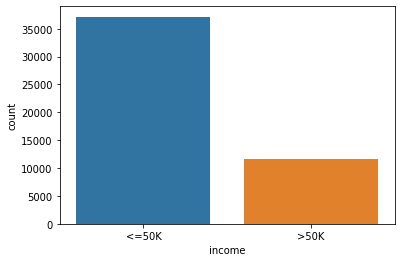

In [8]:
# Analysing the income 

sns.countplot(x="income",data=data)

In [9]:
data["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [10]:
print(f"<=50K : {round(37155/48842 * 100 ,2)}")
print(f">50K : {round(11687/48842 * 100 ,2)}")


<=50K : 76.07
>50K : 23.93


## DATA CLEANING

In [11]:
# Here we will check the missing values in our dataset

data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

##### Handling Numerical Data

In [12]:
numerical= [i for i in data.columns if data[i].dtypes != "O"]

In [13]:
numerical

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [14]:
for i in numerical:
    print(f" {i} : {len(data[i].unique())}")

 age : 74
 fnlwgt : 28523
 educational-num : 16
 capital-gain : 123
 capital-loss : 99
 hours-per-week : 96


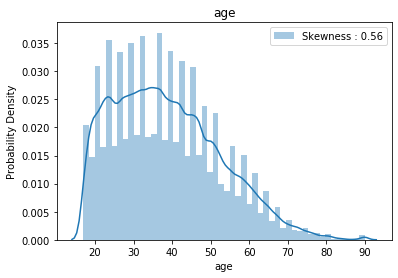

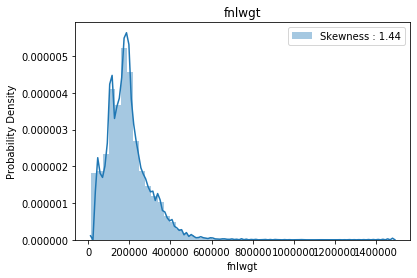

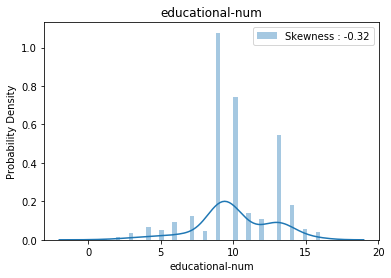

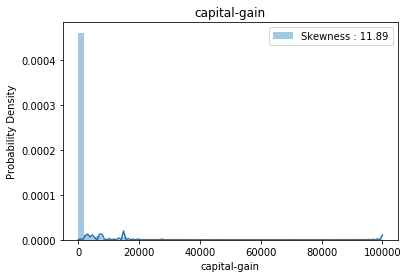

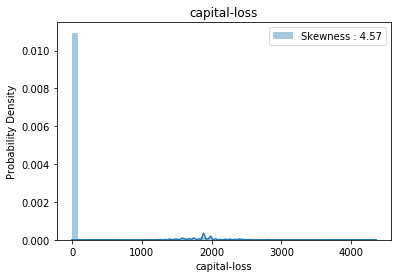

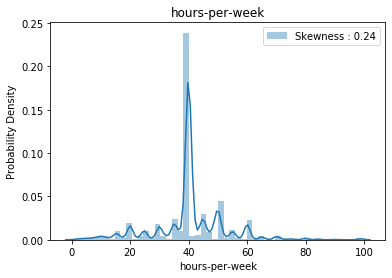

In [15]:
for feature in numerical:
    bar=sns.distplot(data[feature],kde_kws={'bw' : 1})
    bar.legend(["Skewness : {:0.2f}".format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability Density")
    plt.title(feature)
    plt.show()

#### Handling Categorical Data

In [16]:
categorical= [i for i in data.columns if data[i].dtypes == "O"]

In [17]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [18]:
for feature in categorical:
    print(f" {feature} : {len(data[feature].unique())}")

 workclass : 9
 education : 16
 marital-status : 7
 occupation : 15
 relationship : 6
 race : 5
 gender : 2
 native-country : 42
 income : 2


In [19]:
for feature in categorical:
    print(data[feature].value_counts())
    print("\n \n")

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical

#### Handling Missing Values in Categorical Data

In [20]:
print(f"workclass : {round(2799 / 48842 ,4) *100}%")
print(f"occupation : {round(2809 / 48842 ,4) *100}%")
print(f"native-country : {round(857 / 48842 ,4) *100}%")

workclass : 5.7299999999999995%
occupation : 5.75%
native-country : 1.7500000000000002%


#### Here we have less than 6% missing values so we can fill it with mode value

In [21]:
data["workclass"] = data["workclass"].str.replace('?', 'Private')
data["occupation"] = data["occupation"].str.replace('?', 'Prof-specialty')
data["native-country"] = data["native-country"].str.replace('?', 'United-States')

In [22]:
# Education Category

data["education"].replace(["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th"],'School', 
                          inplace=True, regex=True)

data["education"].replace(["Assoc-acdm","Assoc-voc","Prof-school","Some-college"], 'Higher',
                         inplace=True, regex=True)


In [23]:
# Marital Status

data["marital-status"].replace(["Married-civ-spouse","Married-AF-spouse"], 'Married',
                              inplace=True , regex=True)

data["marital-status"].replace(["Married-spouse-absent","Widowed","Separated","Divorced"], 'Other',
                              inplace=True , regex=True)

In [24]:
# Income

data["income"] = data["income"].replace({"<=50K" : 0, ">50K" : 1},regex=True)

In [25]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Higher,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Higher,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Higher,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


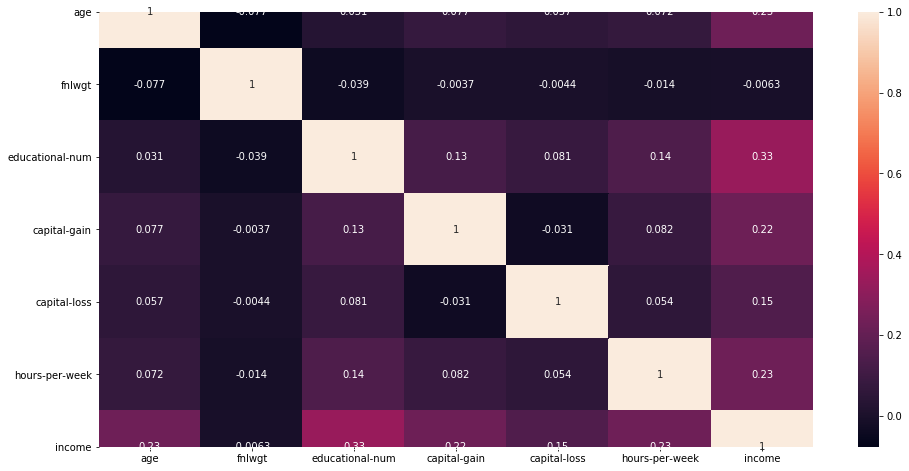

In [26]:
# Heatmap

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

# Exploratory Data Analysis

#### Education

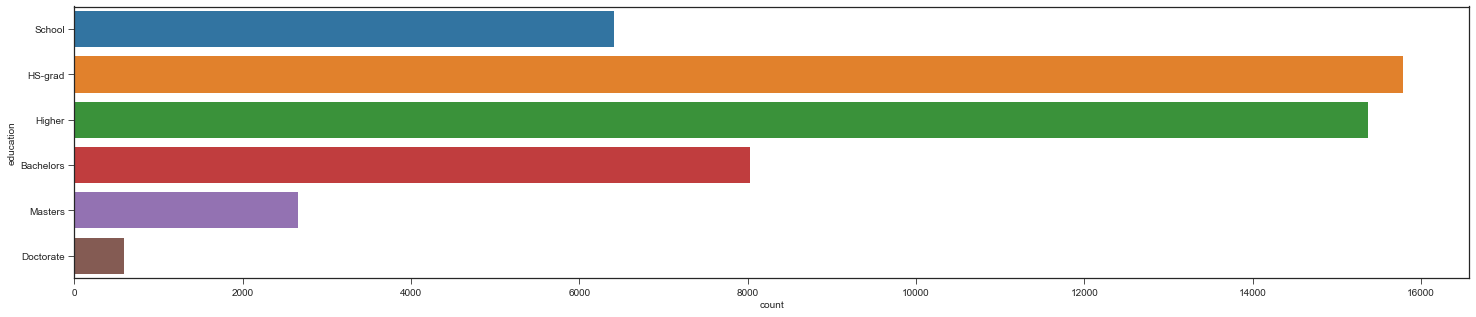

In [27]:
fig = plt.figure(figsize=(25,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=data)

Text(0, 0.5, 'Number of entities')

<Figure size 1080x720 with 0 Axes>

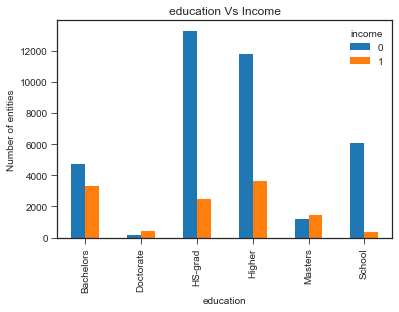

In [29]:
fig = plt.figure(figsize=(15,10))
pd.crosstab(data.education,data.income).plot(kind='bar')
plt.title('education Vs Income')
plt.xlabel('education')
plt.ylabel('Number of entities')

#### Marital-status

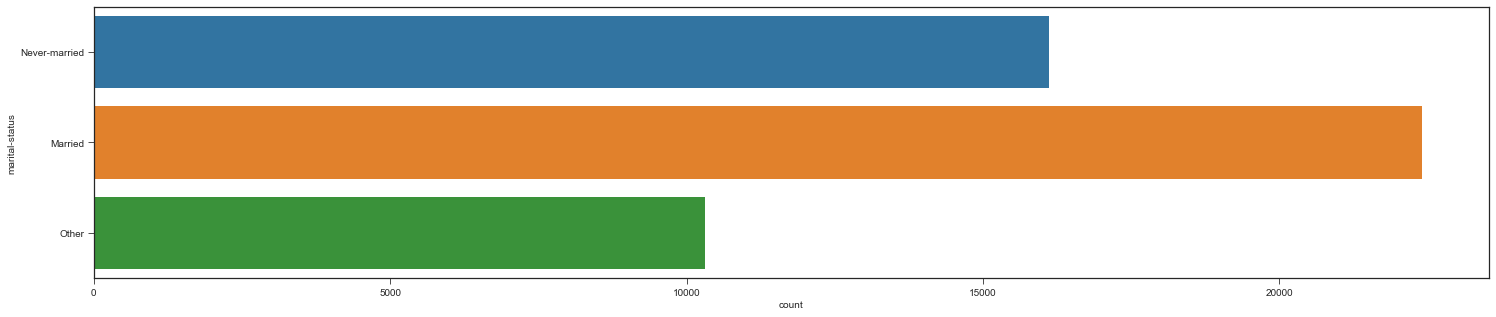

In [30]:
fig = plt.figure(figsize=(25,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=data)

#### Gender

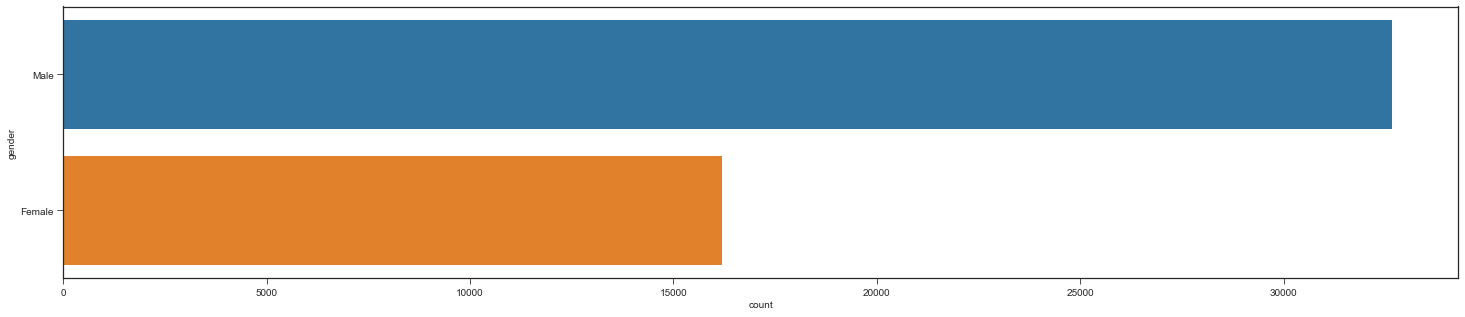

In [43]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(25,5)) 
sns.countplot(y="gender", data=data)

Text(0, 0.5, 'Number of entities')

<Figure size 1080x720 with 0 Axes>

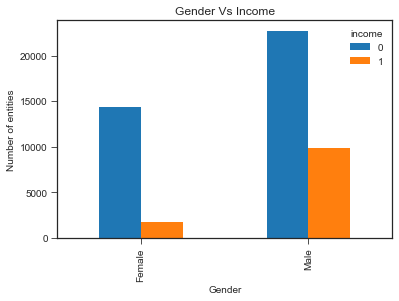

In [44]:
fig = plt.figure(figsize=(15,10))
pd.crosstab(data.gender,data.income).plot(kind='bar')
plt.title('Gender Vs Income')
plt.xlabel('Gender')
plt.ylabel('Number of entities')

#### Occupation

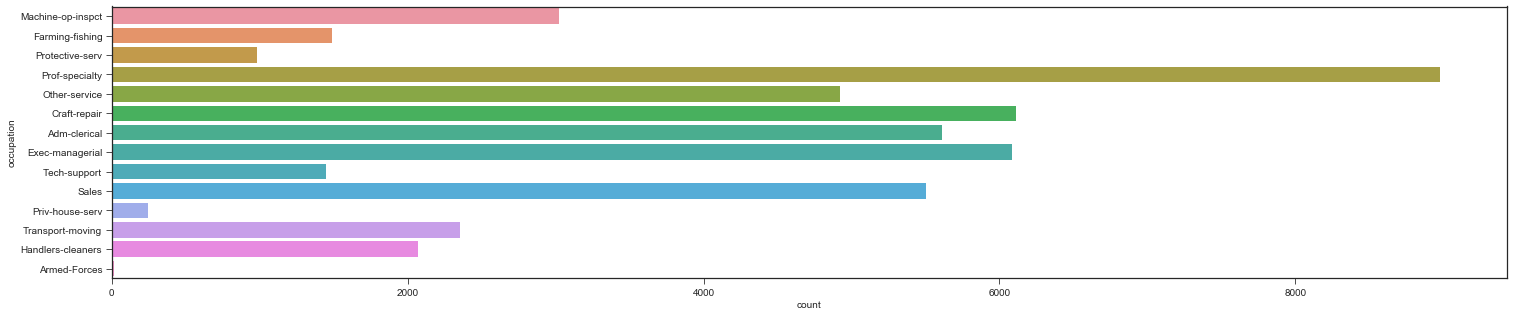

In [31]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(25,5)) 
sns.countplot(y="occupation", data=data)

Text(0, 0.5, 'Number of entities')

<Figure size 1080x720 with 0 Axes>

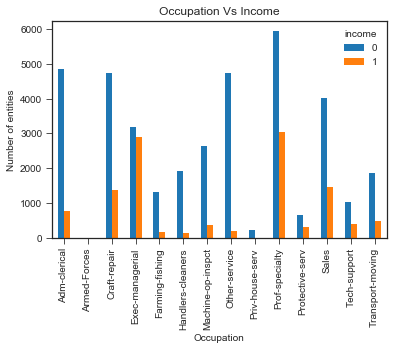

In [32]:
fig = plt.figure(figsize=(15,10))
pd.crosstab(data.occupation,data.income).plot(kind='bar')
plt.title('Occupation Vs Income')
plt.xlabel('Occupation')
plt.ylabel('Number of entities')

#### Workclass

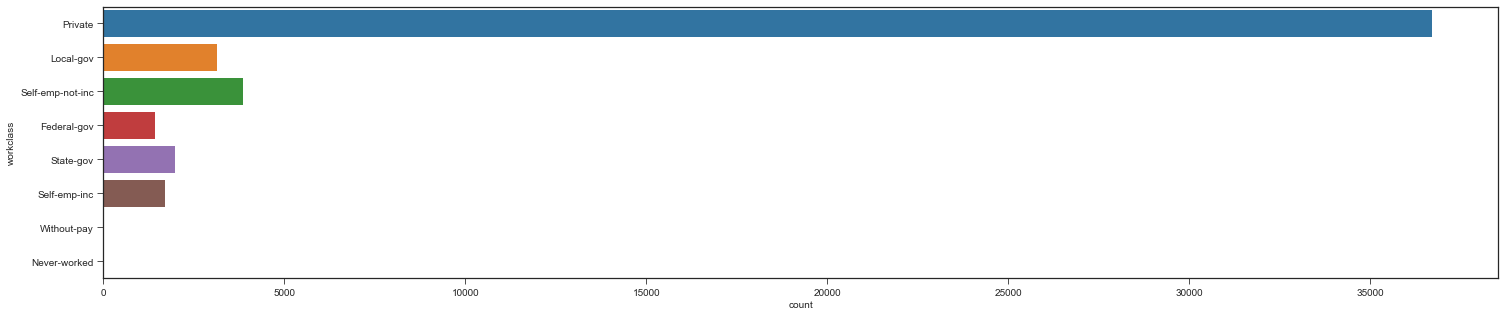

In [33]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(25,5)) 
sns.countplot(y="workclass", data=data)

Text(0, 0.5, 'Number of entities')

<Figure size 1080x720 with 0 Axes>

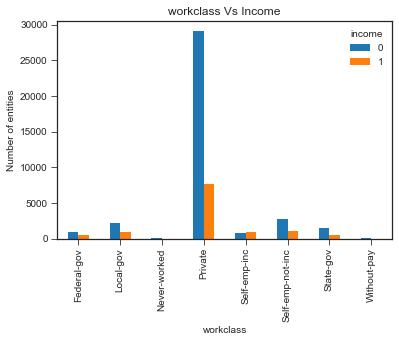

In [34]:
fig = plt.figure(figsize=(15,10))
pd.crosstab(data.workclass,data.income).plot(kind='bar')
plt.title('workclass Vs Income')
plt.xlabel('workclass')
plt.ylabel('Number of entities')

#### Age

In [35]:
# make the age variable discretized 
data['age_bin'] = pd.cut(data['age'], 20)

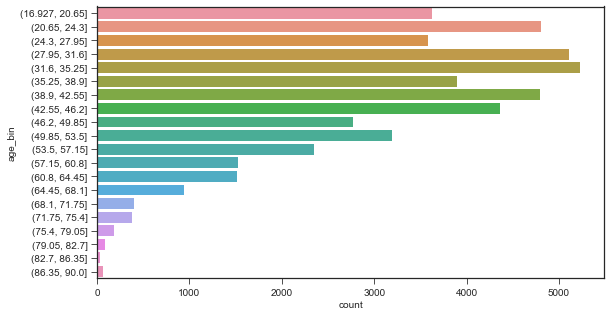

In [36]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=data)



Text(0, 0.5, 'Number of entities')

<Figure size 1080x720 with 0 Axes>

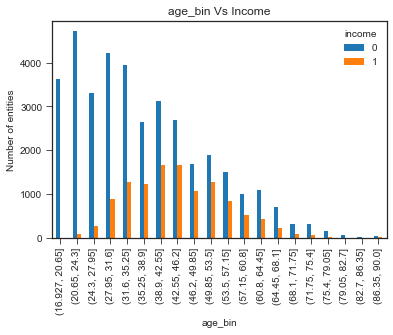

In [37]:
fig = plt.figure(figsize=(15,10))
pd.crosstab(data.age_bin,data.income).plot(kind='bar')
plt.title('age_bin Vs Income')
plt.xlabel('age_bin')
plt.ylabel('Number of entities')

In [59]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


#### Race

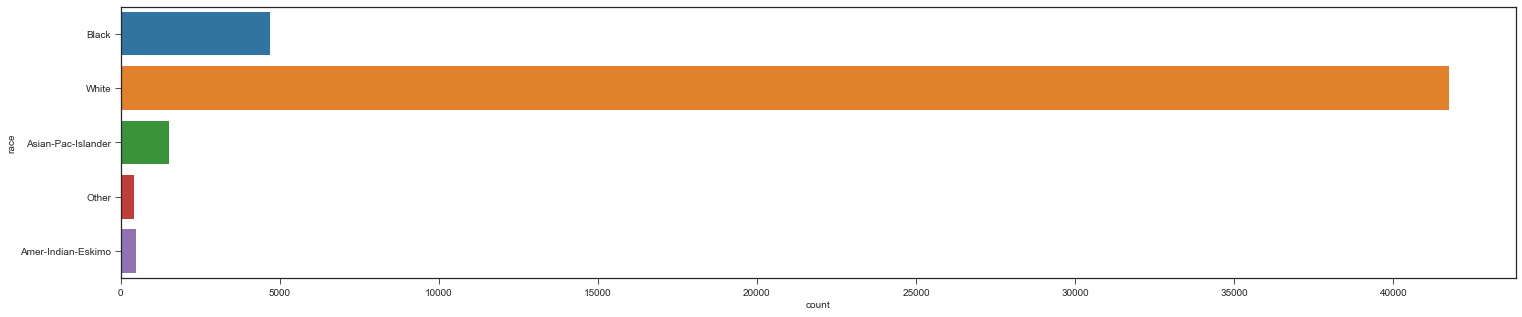

In [38]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(25,5)) 
sns.countplot(y="race", data=data)


Text(0, 0.5, 'Number of entities')

<Figure size 1080x720 with 0 Axes>

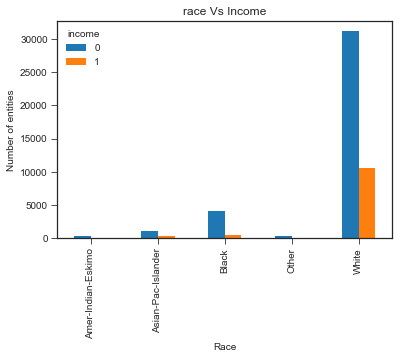

In [39]:
fig = plt.figure(figsize=(15,10))
pd.crosstab(data.race,data.income).plot(kind='bar')
plt.title('race Vs Income')
plt.xlabel('Race')
plt.ylabel('Number of entities')

#### Hours of Work

In [40]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
data['hours-per-week_bin'] = pd.cut(data['hours-per-week'], 10)
data['hours-per-week'] = data['hours-per-week']


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20, 60)

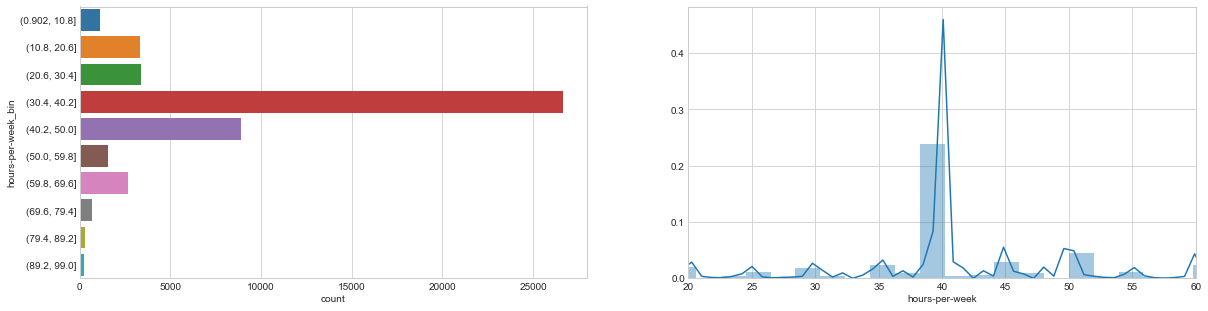

In [41]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=data);
plt.subplot(1, 2, 2)
sns.distplot(data['hours-per-week']);
sns.distplot(data[data['income'] == '1']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(data[data['income'] == '0']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

#### Pair Plot

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


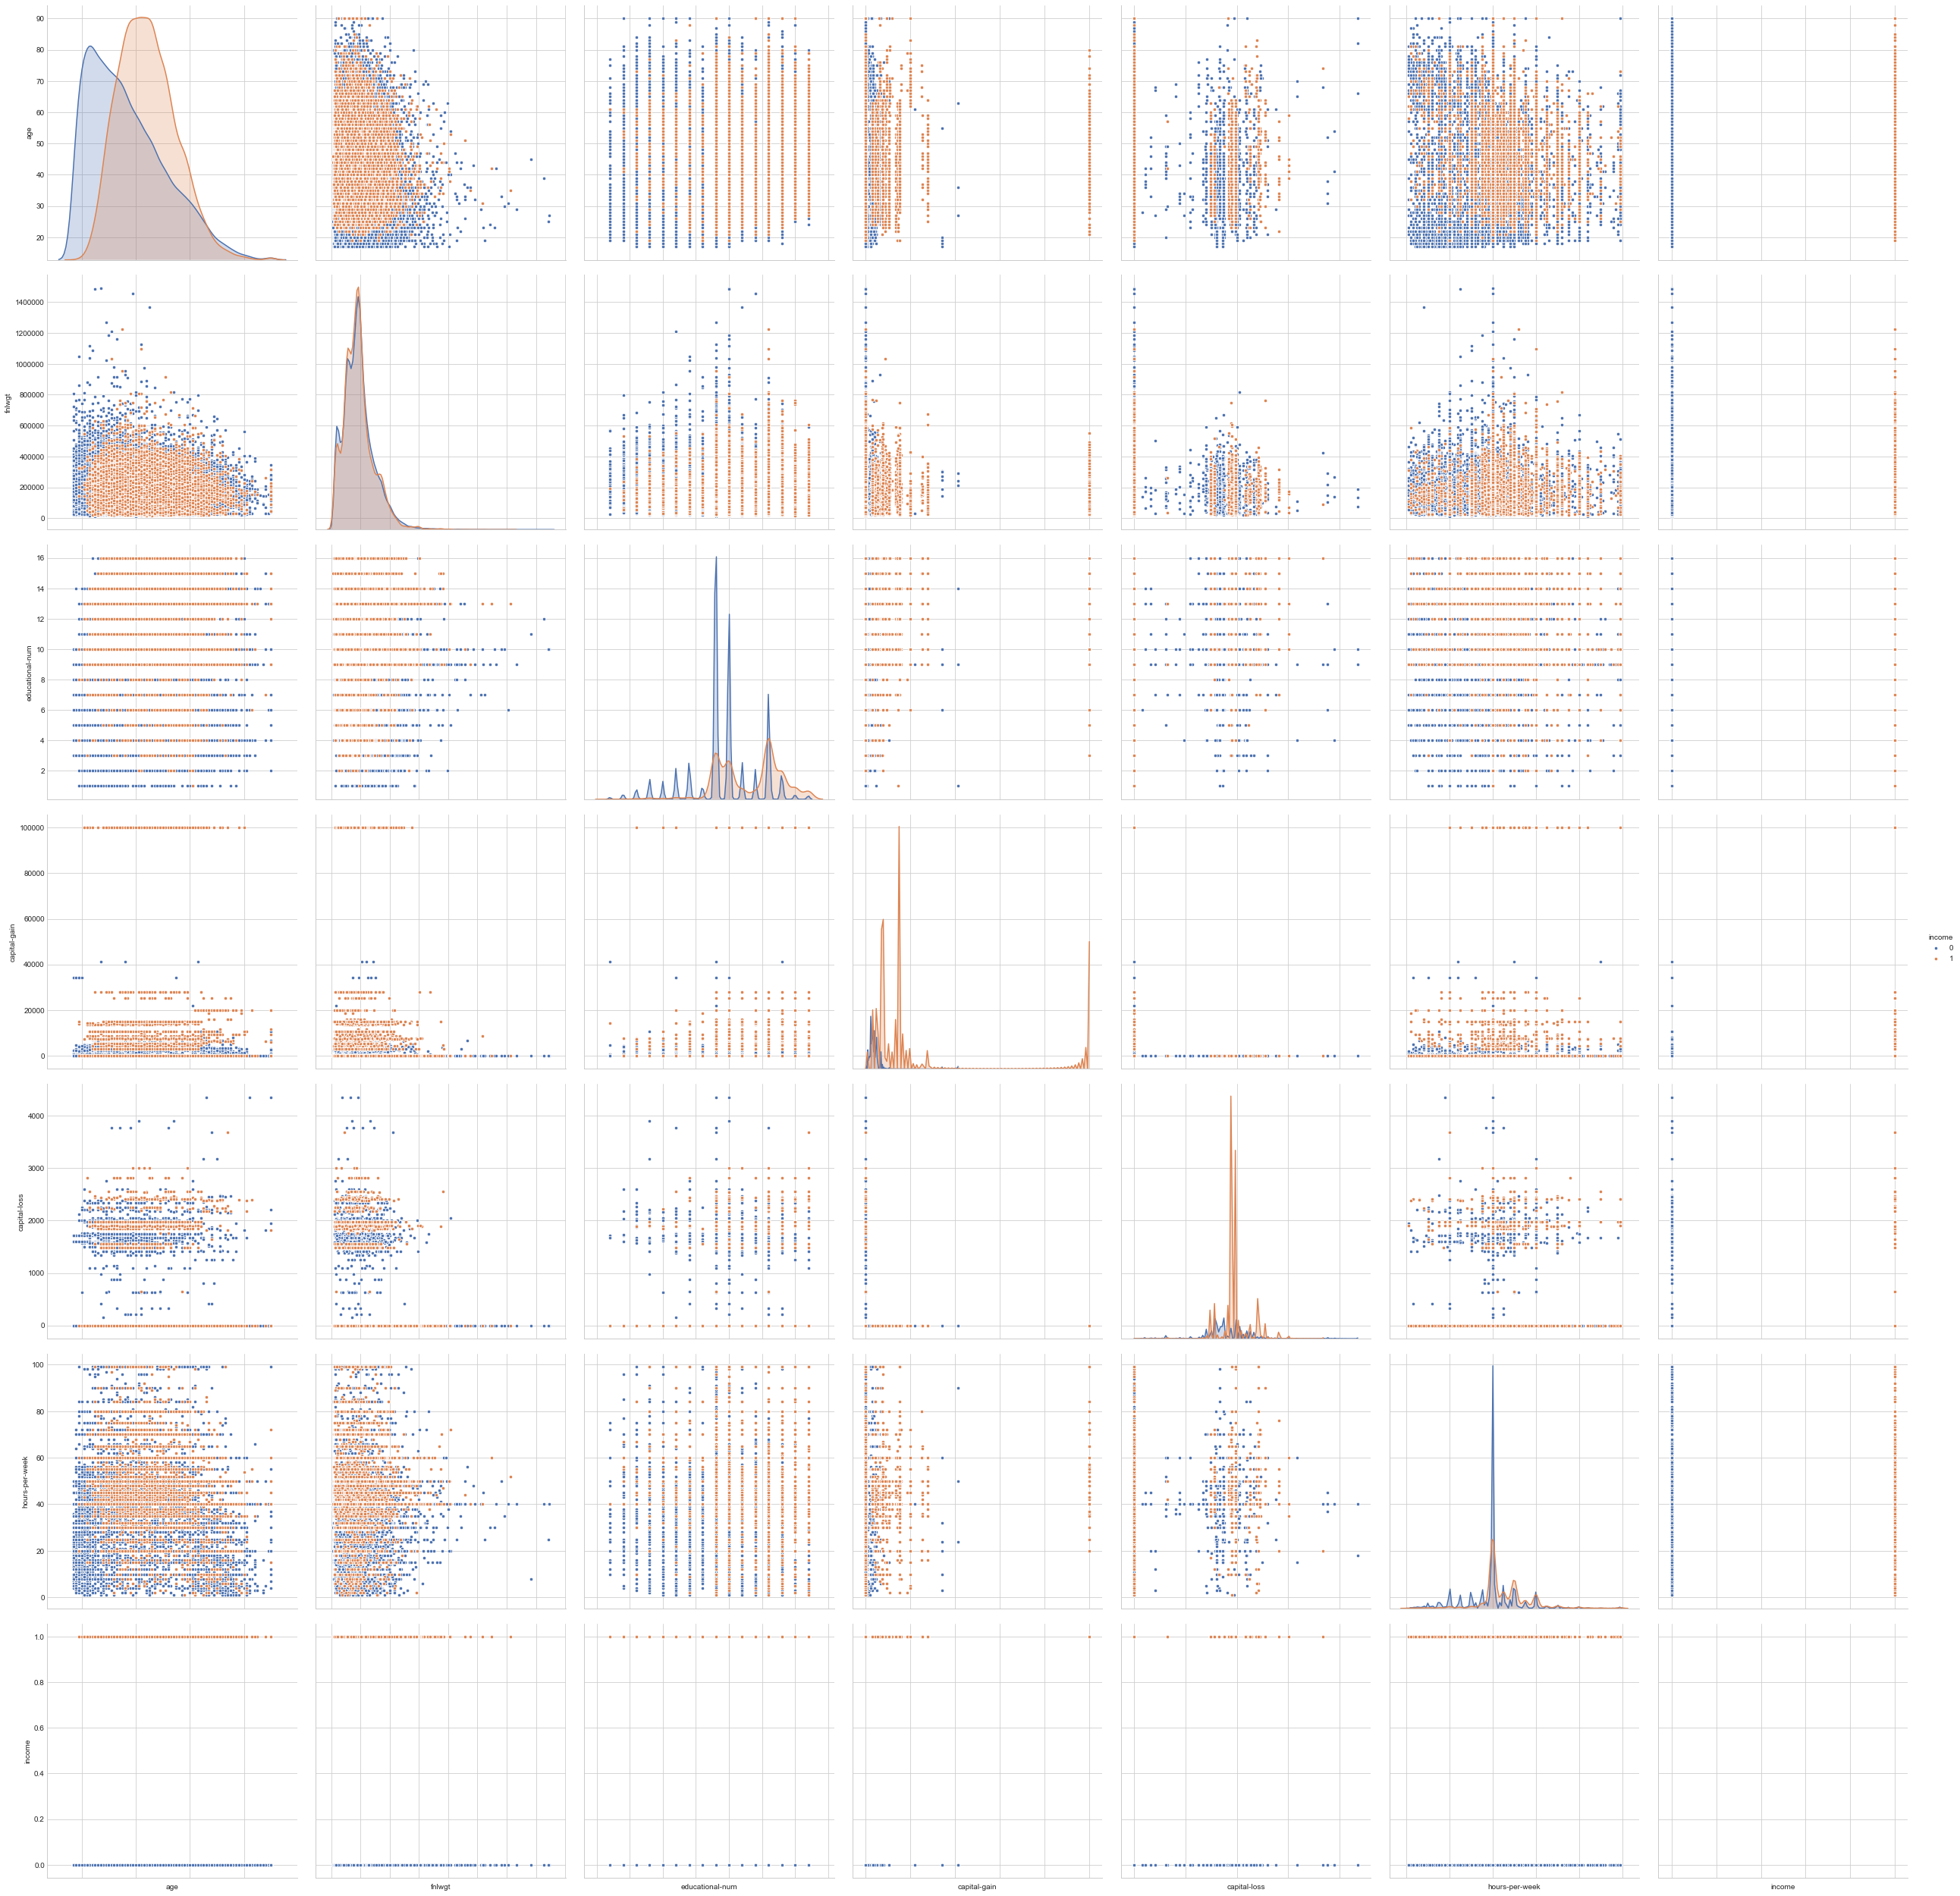

In [63]:
#pair plots of entire dataset
pp = sns.pairplot(data, hue = 'income', palette = 'deep', 
                  size=5, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

#### Occupation vs. Income Level

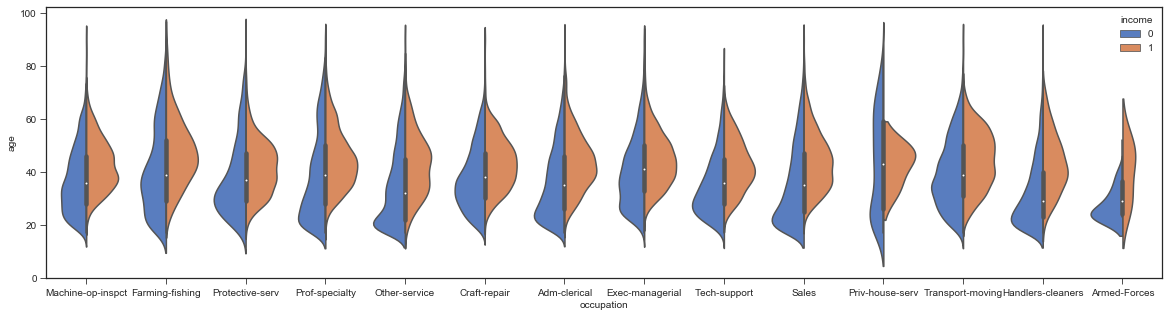

In [45]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="income",
                    data=data, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

The general trend is in sync with common sense: more senior workers have higher salaries. Armed-forces don't have a high job salaries.

Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs.

### Feature Selection and Encoding

In [46]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [47]:
data = data.apply(LabelEncoder().fit_transform)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin
0,8,3,19329,5,6,1,6,3,2,1,0,0,39,38,0,2,3
1,21,3,4212,2,8,0,4,0,4,1,0,0,49,38,0,5,4
2,11,1,25340,3,11,0,10,0,4,1,0,0,39,38,1,3,3
3,27,3,11201,3,9,0,6,0,2,1,98,0,39,38,1,7,3
4,1,3,5411,3,9,1,9,3,4,0,0,0,29,38,0,0,2


## Building Machine Learning Models

### Train-Test-Split

In [48]:
from sklearn.model_selection import train_test_split

y = data['income'].values
X = data.drop('income', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Apply Principal Component Analysis

In [49]:
from sklearn.decomposition import PCA
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

#### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logre=LogisticRegression()
logre.fit(X_train,y_train)
pred=logre.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve

In [52]:
def dispAcc(pred):
    print("Classification Report")
    print(classification_report(y_test,pred))
    print("Accuracy is ",accuracy_score(y_test,pred))
    print("Precision is ", precision_score(y_test,pred,pos_label='positive',
                                           average='micro'))
    print("Recall is ",recall_score(y_test,pred,pred,pos_label='positive',
                                           average='micro'))
    print("f1 score is ",f1_score(y_test,pred,pred,pos_label='positive',
                                           average='micro'))
    confusion_matrix(y_test,pred)


In [53]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7479
           1       0.70      0.54      0.61      2290

    accuracy                           0.84      9769
   macro avg       0.79      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769

Accuracy is  0.8386733544886887
Precision is  0.8386733544886887
Recall is  0.9041976058288911
f1 score is  0.8823106085982427


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


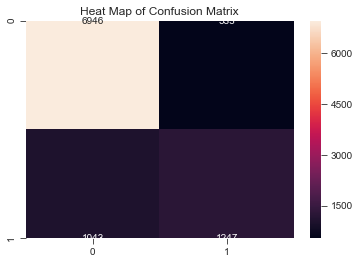

In [54]:
cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()

#### Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7479
           1       0.73      0.48      0.58      2290

    accuracy                           0.84      9769
   macro avg       0.79      0.71      0.74      9769
weighted avg       0.83      0.84      0.82      9769

Accuracy is  0.8365236974101751
Precision is  0.8365236974101751
Recall is  0.9226592768492707
f1 score is  0.8854748360365974


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


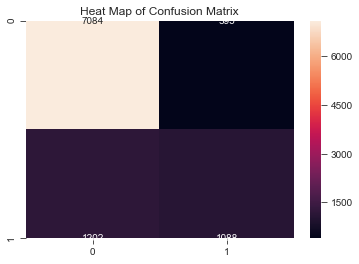

In [57]:
cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()

####  Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
pred=dt_model.predict(X_test)

In [59]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7479
           1       0.56      0.60      0.58      2290

    accuracy                           0.80      9769
   macro avg       0.72      0.73      0.72      9769
weighted avg       0.80      0.80      0.80      9769

Accuracy is  0.7974204115057836
Precision is  0.7974204115057836
Recall is  0.8340492219062797
f1 score is  0.8390457491486563


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


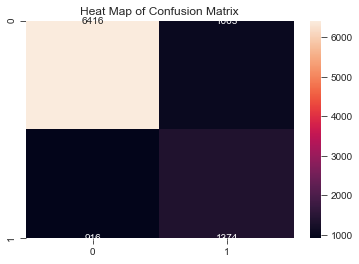

In [60]:
cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()

#### K-Nearest Neighbours

In [61]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbour=np.arange(3,15)
for k in neighbour:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,pred)
    acc_val.append(acc)

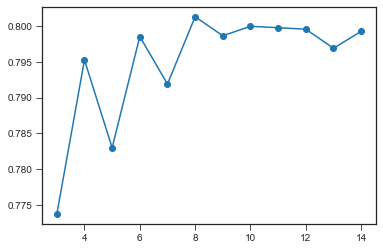

In [62]:
plt.plot(neighbour,acc_val,"o-")

In [63]:
classifier=KNeighborsClassifier(n_neighbors=8,metric="minkowski")
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)


In [64]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7479
           1       0.69      0.28      0.39      2290

    accuracy                           0.80      9769
   macro avg       0.75      0.62      0.64      9769
weighted avg       0.78      0.80      0.77      9769

Accuracy is  0.8013102671716654
Precision is  0.8013102671716654
Recall is  0.9409487767033627
f1 score is  0.8714490503575488


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


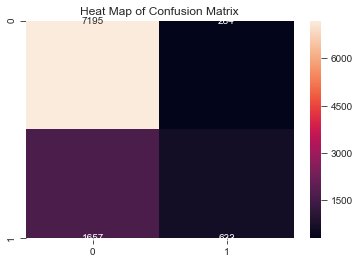

In [65]:

cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()

#### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

In [67]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7479
           1       0.65      0.37      0.47      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.66      0.68      9769
weighted avg       0.79      0.81      0.79      9769

Accuracy is  0.8060190398198382
Precision is  0.8060190398198382
Recall is  0.9137089975783804
f1 score is  0.8674591292063023


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


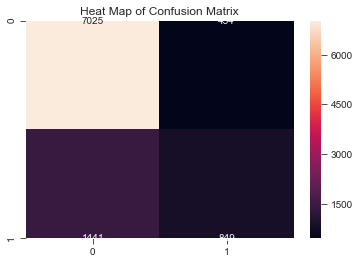

In [68]:
cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()

#### Bernouli Naive Bayes

In [69]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

In [70]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7479
           1       0.68      0.42      0.52      2290

    accuracy                           0.82      9769
   macro avg       0.76      0.68      0.70      9769
weighted avg       0.80      0.82      0.80      9769

Accuracy is  0.8171767837035521
Precision is  0.8171767837035521
Recall is  0.9123603805308975
f1 score is  0.8728561172073768


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


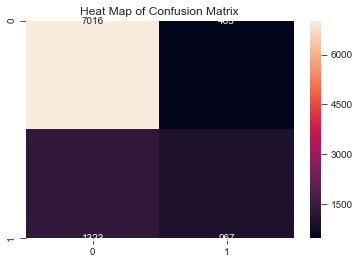

In [71]:
cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()

#### Support Vector Machine

In [182]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
pred=svm_linear.predict(X_test)

In [183]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7479
           1       0.71      0.51      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.79      0.72      0.75      9769
weighted avg       0.83      0.84      0.83      9769

Accuracy is  0.8366260620329614


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Precision is  0.8366260620329614
Recall is  0.9106949381412109
f1 score is  0.8827687157611649


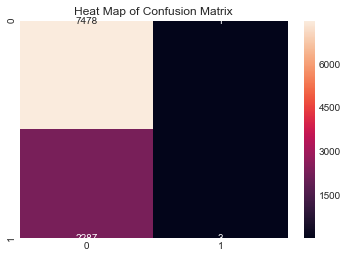

In [185]:
cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()

In [184]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(X_train,y_train)
pred=svm_linear.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [186]:
dispAcc(pred)

Classification Report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7479
           1       0.75      0.00      0.00      2290

    accuracy                           0.77      9769
   macro avg       0.76      0.50      0.43      9769
weighted avg       0.76      0.77      0.66      9769

Accuracy is  0.7657897430647969
Precision is  0.7657897430647969
Recall is  0.9997410653477652
f1 score is  0.867269050114457


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


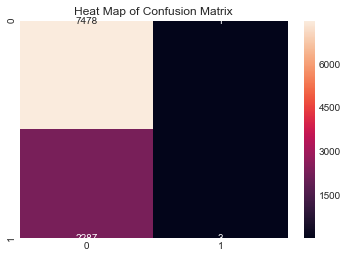

In [187]:
cm=confusion_matrix(y_test,pred)
plt.title("Heat Map of Confusion Matrix")
sns.heatmap(cm,annot=True, fmt = 'd')
plt.show()